1. Data Preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Preprocessing Training Dataset

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [4]:
training_set = train_datagen.flow_from_directory('D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 5712 images belonging to 4 classes.


In [5]:
# Preprocessing Testing Dataset
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


2. Building The CNN Model

In [7]:
cnn= tf.keras.models.Sequential()

In [8]:
# Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Max Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
# Adding Another Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [17]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [19]:
# Full Connection Layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [21]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

3. Training CNN

In [23]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [25]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.5138 - loss: 1.0870

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 224ms/step - accuracy: 0.5143 - loss: 1.0860 - val_accuracy: 0.4493 - val_loss: 1.9330
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.7438 - loss: 0.6833 - val_accuracy: 0.4394 - val_loss: 2.4208
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 188ms/step - accuracy: 0.7958 - loss: 0.5586 - val_accuracy: 0.5278 - val_loss: 1.4779
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 188ms/step - accuracy: 0.8033 - loss: 0.5129 - val_accuracy: 0.6644 - val_loss: 1.2399
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.8278 - loss: 0.4426 - val_accuracy: 0.6514 - val_loss: 1.0184
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.8472 - loss: 0.3994 - val_accuracy: 0.6804 - val_loss: 1.0041
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.8355 - loss: 0.4197 - val_accuracy: 0.6201 - val_loss: 1.1800
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.8720 - loss: 0.3338 - val

In [27]:
loss, accuracy = cnn.evaluate(test_set)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.8873 - loss: 0.3211
Test Accuracy: 88.48%


In [29]:
import numpy as np
from keras.preprocessing import image

# Load and preprocess the test image
test_image = image.load_img('D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Testing\\glioma\\Te-gl_0027.jpg', target_size=(64, 64)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
result = cnn.predict(test_image)

# Get the predicted class index (argmax for multiclass classification)
predicted_class = np.argmax(result, axis=1)

# Define the class labels
class_labels = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Get the predicted class label
prediction = class_labels[predicted_class[0]]

# Output the prediction
print(f'Predicted Class: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted Class: no tumor


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


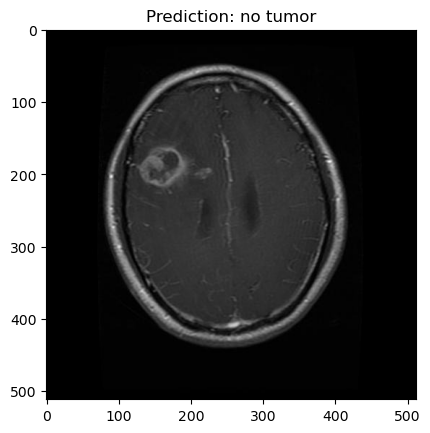

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Define the image path (you can modify this to any path)
image_path = 'D:\\ML Projects\\Deep Learning\\brain tumor detection\\Dataset\\Testing\\glioma\\Te-gl_0027.jpg'  # Replace with the desired image path

# Load and preprocess the image from the path
sample_image = image.load_img(image_path, target_size=(64, 64))  # Resize to match model's input size
sample_image = image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)  # Add a batch dimension

# Make a prediction for the sample image
prediction = cnn.predict(sample_image)

# Get the predicted class (argmax to get the class with the highest probability)
predicted_class = np.argmax(prediction, axis=1)

# Define class labels (assuming your classes are glioma, meningioma, no tumor, and pituitary)
class_labels = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Display the sample image with the predicted class label
plt.imshow(image.load_img(image_path))  # Display the original image
plt.title(f'Prediction: {class_labels[predicted_class[0]]}')
plt.show()
